In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual filename of your CSV
df = pd.read_csv('D:\Datasets\Mountain vs. Beaches dataset\mountains_vs_beaches_preferences.csv')

#modifying the data
df['Preference'] = df['Preference'].replace({0: 'beaches', 1: 'mountains'}) 



In [ ]:
df.head() #to get first 5 values of data

df.describe() # to describe the data

df.info() #to view datatypes of columns and info

df.isnull().sum() #it aggregaes the missing values sum by columns. basicaly it shows how many null values are there

df.duplicated().sum() #to get the sum of all the duplicates found

df.duplicated(subset=['Age', 'Gender']).sum() #our data do not have ids, if it happens to have then we can use this method to get the duplicates based on specific column or columns

df['Preferred_Activities'].unique() # to check the unique values, so that we can look for spelling mistakes etc.

df['Gender'] = df['Gender'].str.lower() #we can lower all the values on a column by using lower method. if we have inconsistent values then we should use this

df['Gender'] = df['Gender'].str.capitalize() #to capitalize the first letter only

df['Gender'] = df['Gender'].str.title()  #to capitalize first letter of every word

df['Gender'] = df['Gender'].str.upper() #to capitalize all letters

df['Location'] = df['Location'].replace('suburban', 'urban') # to replace certain values with certain values in a column


In [ ]:
#Demographic Insights:
#Q1/2: What is the average age and income of respondents who prefer mountains vs. beaches?

In [3]:
df['Preference'] = df['Preference'].replace({0: 'beaches', 1: 'mountains'}) 
#we have replaced the preference values so it will be easy to understand

print(df['Preference'].value_counts()) #now we will check the value counts

In [12]:
# Now, group by the Preference column and calculate the mean for Age and Income
average_values = df.groupby('Preference')[['Age', 'Income']].mean()


In [13]:
average_values

,Age,Income
Preference,,
beaches,43.498779,70067.292625
mountains,43.533009,69867.770307


In [ ]:
#Demographic Insights:
#Q2/2: What percentage of respondents live in rural, suburban, and urban areas?

In [2]:
percentageofrespondents = df['Location'].value_counts(normalize=True)*100
#to get the percentage of respondents

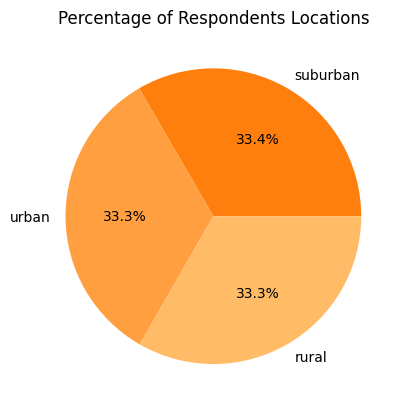

In [19]:
base_color = '#ff7f0e'  # Base orange color
colors = [base_color, '#ff9f40', '#ffbb66', '#ffd699']  

percentageofrespondents.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.ylabel('')
plt.title('Percentage of Respondents Locations')
plt.show()



In [ ]:
#Vacation Budget and Preferences:
#Q1: Calculate the average and median vacation budget for respondents who prefer mountains vs. beaches.

In [ ]:
avgvactionbudget = df.groupby('Vacation_Budget').mean()
#verage_values = df.groupby('Preference')[['Age', 'Income']].mean()

In [28]:
# Calculate average and median vacation budget for mountains and beaches
budget_stats = df.groupby('Preference')['Vacation_Budget'].agg(['mean', 'median']).reset_index()

#further we can rename above resulted coloumns
budget_stats.columns = ['Preference', 'Average_Budget', 'Median_Budget']

In [31]:
budget_stats

,Preference,Average_Budget,Median_Budget
0,beaches,2745.365101,2741.0
1,mountains,2731.141086,2704.5


In [ ]:
#Location and Preference:
#Q: Analyze how proximity to mountains or beaches affects vacation preference.

In [20]:
#to solve the above question, we need to categorize the proximity ranges, because proximity
#coloumn contains int values rather than caegories such as far, close etc.
#Now we will categorize the ranges by creating a function with if statement, and after that we
#will store this function's results in a new variable named for both mountains and beaches by
#using apply method.

def Proximity_Range(distance):
    if distance <50:
        return 'very close'
    elif distance <100:
        return 'close'
    elif distance <200:
        return 'moderate'
    elif distance <300:
        return 'far'
    else:
        return 'very far'


df['Proximity_Range_Mountains'] = df['Proximity_to_Mountains'].apply(Proximity_Range)
df['Proximity_Range_Beaches'] = df['Proximity_to_Beaches'].apply(Proximity_Range)

#Analyze how proximity to mountains or beaches affects vacation preference.
Proximity_vac_pref_m = df.groupby('Preference')['Proximity_Range_Mountains'].value_counts().unstack()
Proximity_vac_pref_b = df.groupby('Preference')['Proximity_Range_Beaches'].value_counts().unstack()

In [ ]:
# Calculate percentage of preferences within each proximity range for beaches
Proximity_vac_pref_b_percentage = Proximity_vac_pref_b.div(Proximity_vac_pref_b.sum(axis=0), axis=1) * 100
Proximity_vac_pref_b_percentage

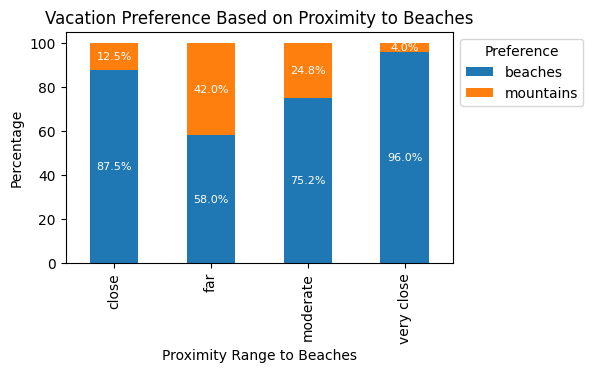

In [36]:
ax = Proximity_vac_pref_b_percentage.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(5, 3))

# Add title and labels
plt.title("Vacation Preference Based on Proximity to Beaches")
plt.ylabel("Percentage")
plt.xlabel("Proximity Range to Beaches")
plt.legend(title="Preference")

# Move the legend to the right of the plot
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))


# Adding percentage labels inside the bars
for p in ax.patches:
    # Get the width and height of each bar
    width, height = p.get_width(), p.get_height()
    
    # Only label bars with non-zero height
    if height > 0:
        # Position the text in the center of the bar
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=8)

plt.show()


In [ ]:
# Calculate percentage of preferences within each proximity range for mountains
Proximity_vac_pref_m_percentage = Proximity_vac_pref_m.div(Proximity_vac_pref_m.sum(axis=0), axis=1) * 100
Proximity_vac_pref_m_percentage

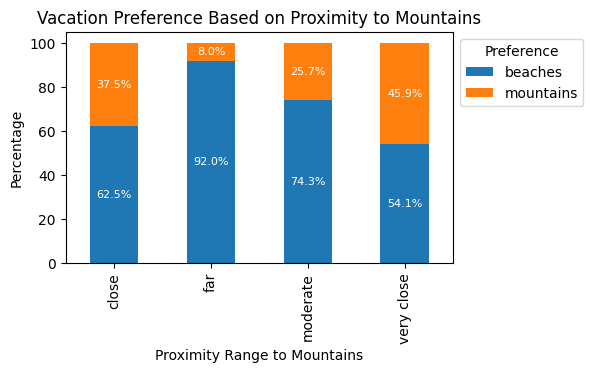

In [35]:
ax = Proximity_vac_pref_m_percentage.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(5, 3))

# Add title and labels
plt.title("Vacation Preference Based on Proximity to Mountains")
plt.ylabel("Percentage")
plt.xlabel("Proximity Range to Mountains")
plt.legend(title="Preference")

# Move the legend to the right of the plot
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))


# Adding percentage labels inside the bars
for p in ax.patches:
    # Get the width and height of each bar
    width, height = p.get_width(), p.get_height()
    
    # Only label bars with non-zero height
    if height > 0:
        # Position the text in the center of the bar
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=8)

plt.show()


In [ ]:
#Create Age Groups:
#Segment respondents into age groups (e.g., 18-25, 26-35, etc.) and analyze vacation preferences by age group.

In [ ]:
def Age_Range(age):
    if 18 <= age <= 25:
        return "teenagers"
    elif 26 <= age <= 35:
        return "youth"
    elif 36 <= age <= 50:
        return "adults"
    else:
        return "Older"


# Apply Age_Range function to categorize ages
df['Age_Range_Vac_Preferences'] = df['Age'].apply(Age_Range)

# Group by 'Preference' and 'Age_Range_Vac_Preferences' to get counts
Ages_Pref = df.groupby(['Preference', 'Age_Range_Vac_Preferences']).size().unstack()

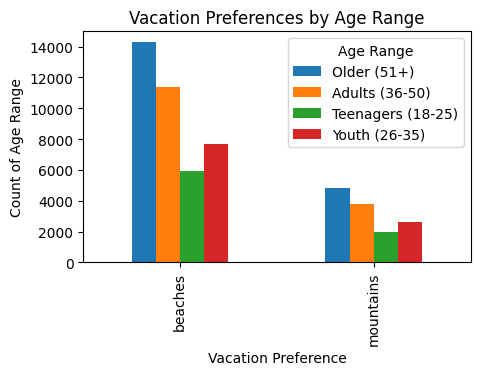

In [ ]:
import matplotlib.pyplot as plt

# Define age range descriptions for using it in plot's legend
age_ranges = {
    "teenagers": "Teenagers (18-25)",
    "youth": "Youth (26-35)",
    "adults": "Adults (36-50)",
    "Older": "Older (51+)"
}

# Plot the chart
ax = Ages_Pref.plot(kind='bar', stacked=False, figsize=(5, 3))
plt.xlabel("Vacation Preference")
plt.ylabel("Count of Age Range")
plt.title("Vacation Preferences by Age Range")

# Update legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[age_ranges[label] for label in labels], title="Age Range")

plt.show()


In [14]:
#Gender percentage of participants
gender_counts = df.groupby('Gender').size()

# Calculate the percentage for each gender
gender_percentage = (gender_counts / gender_counts.sum()) * 100
gender_percentage


Gender
female        33.632065
male          33.410876
non-binary    32.957059
dtype: float64

In [19]:
education_level = df.groupby('Education_Level').size()

education_level_percentage = (education_level / education_level.sum()) * 100
education_level_percentage

Education_Level
bachelor       25.030509
doctorate      25.347037
high school    24.925635
master         24.696819
dtype: float64

In [ ]:
PreferredActivitesByLocation = df.groupby(['Location', 'Preferred_Activities']).size()

PreferredActivitesByLocation

Location  Preferred_Activities
rural     hiking                  4396
          skiing                  4407
          sunbathing              4406
          swimming                4256
suburban  hiking                  4305
          skiing                  4412
          sunbathing              4442
          swimming                4344
urban     hiking                  4401
          skiing                  4348
          sunbathing              4373
          swimming                4354
dtype: int64

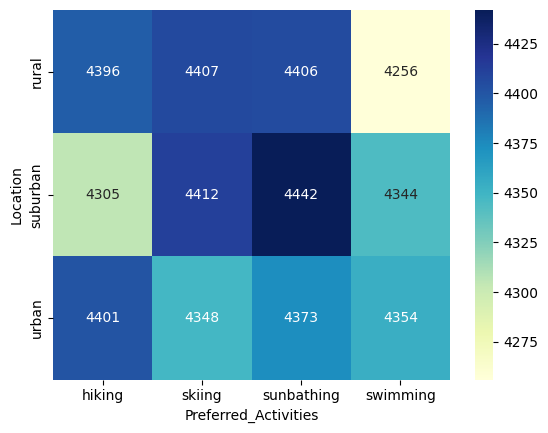

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(PreferredActivitesByLocation.unstack(), annot=True, cmap="YlGnBu", fmt="d")
plt.show()

In [ ]:
#Visualize Age Distribution:
#Q: Create a histogram to visualize the distribution of ages.

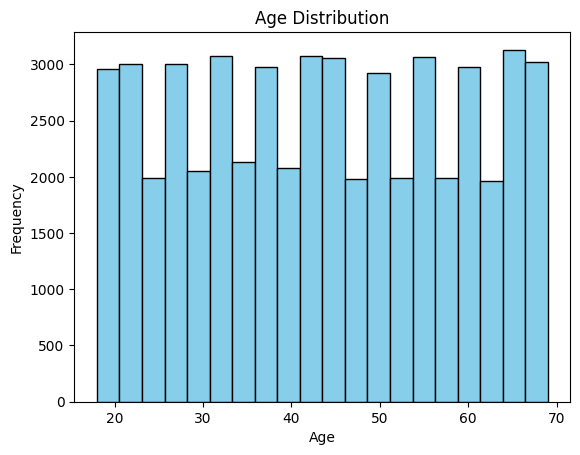

In [12]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Vacation Preferences by Gender:
#Q: Use a bar chart to show preferences for mountains vs. beaches by gender.

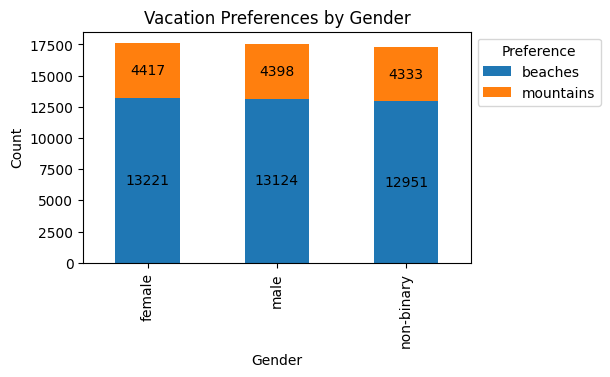

In [8]:
Vaction_Preference_By_Gender = df.groupby(['Gender', 'Preference']).size()
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
ax = Vaction_Preference_By_Gender.unstack().plot(kind='bar', stacked=True, figsize=(5, 3))
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))

# Adding axis labels and a title
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Vacation Preferences by Gender")

# Adding numbers inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()


In [29]:
#Income and Vacation Budget:
#Plot a scatter plot to show the relationship between income and vacation budget.
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,mountains
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,beaches
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,mountains
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,mountains
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,beaches


In [ ]:
#Seasonal Preference:
#Create a pie chart to show the distribution of favorite seasons.

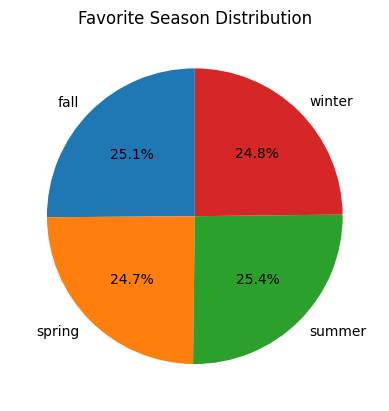

In [18]:
FavoriteSeason = df.groupby('Favorite_Season').size()
ax = FavoriteSeason.plot(kind='pie', autopct='%1.1f%%', startangle=90)  # Display percentages on the pie chart

ax.set_title("Favorite Season Distribution")
ax.set_ylabel('')  # Optional, to remove the y-axis label for a cleaner look
plt.show()



In [ ]:
#Location and Vacation Preference Analysis:
#Q: Use a stacked bar chart to show the effect of Location on vacation preference.

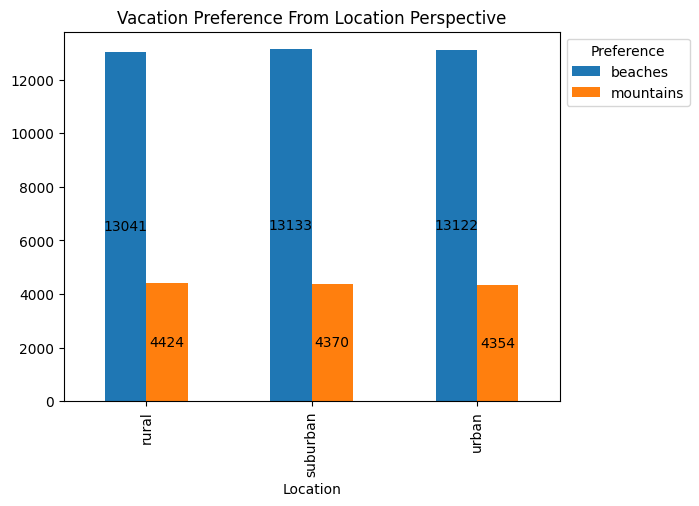

In [21]:
Preference_ProximityToLocation = df.groupby(['Location', 'Preference']).size()
ax = Preference_ProximityToLocation.unstack().plot(kind='bar')
# Move the legend to the right of the plot
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title("Vacation Preference From Location Perspective")
ax.set_ylabel('')  # Optional, to remove the y-axis label for a cleaner look

for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [ ]:
#6. Answer Key Analytical Questions
#Q1/2: What are the top three factors (age, income, travel frequency, etc.) that influence the preference for mountains vs. beaches?

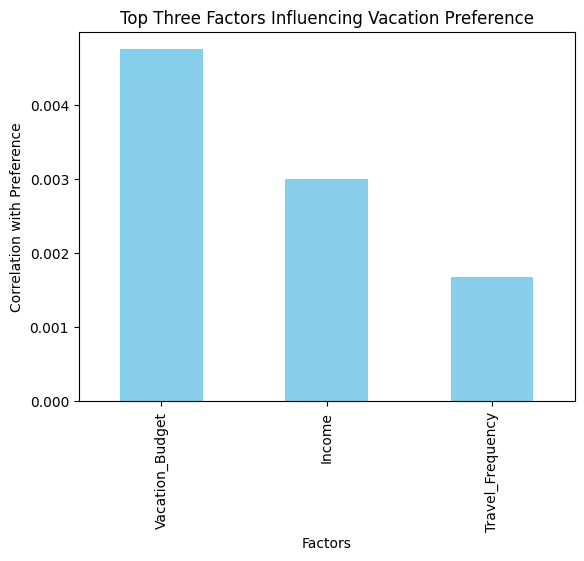

Top factors influencing vacation preference:
 Vacation_Budget     0.004754
Income              0.002998
Travel_Frequency    0.001680
Name: Preference, dtype: float64


In [2]:
import matplotlib.pyplot as plt

# Reverse encoding of 'Preference' to numeric for correlation calculation
df['Preference'] = df['Preference'].map({'mountains': 0, 'beaches': 1})

# Select only numerical columns to calculate correlation with 'Preference'
correlation = df[['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Preference']].corr()['Preference'].abs().sort_values(ascending=False)

# Select top 3 factors (excluding 'Preference' itself)
top_factors = correlation[1:4]

# Plot the top three factors
top_factors.plot(kind='bar', color='skyblue')
plt.title('Top Three Factors Influencing Vacation Preference')
plt.ylabel('Correlation with Preference')
plt.xlabel('Factors')
plt.show()

# Display the correlation values for insight
print("Top factors influencing vacation preference:\n", top_factors)


In [ ]:
#6. Answer Key Analytical Questions
# Q2/3: Do people with environmental concerns lean towards a particular vacation type?

In [ ]:
df['Environmental_Concerns'] = df['Environmental_Concerns'].map({0: 'No', 1: 'Yes'})

C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_16584\2091689722.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Vaction_Preference_BasedOn_EnvirnmentalConcerns = df.groupby(['Environmental_Concerns', 'Preference']).size()


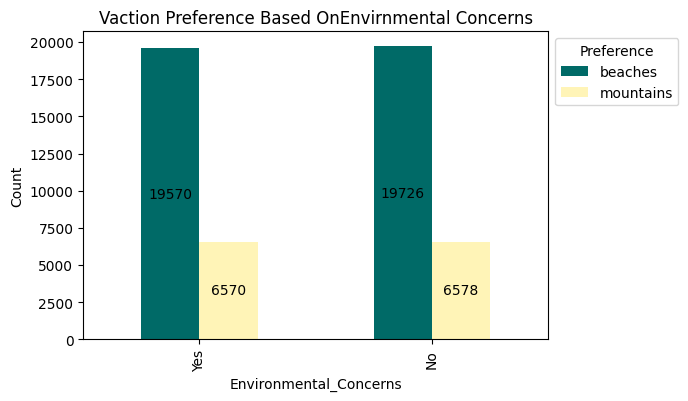

In [12]:
df['Environmental_Concerns'] = pd.Categorical(df['Environmental_Concerns'], categories=['Yes', 'No'], ordered=True)
#above code just to reorder the yes or no columns in graph


Vaction_Preference_BasedOn_EnvirnmentalConcerns = df.groupby(['Environmental_Concerns', 'Preference']).size()
ax = Vaction_Preference_BasedOn_EnvirnmentalConcerns.unstack().plot(kind='bar', figsize=(6, 4), color=['#006A67', '#FFF4B7'])

# Move the legend to the right of the plot
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title("Vaction Preference Based OnEnvirnmental Concerns")
ax.set_ylabel('Count')  # Optional, to remove the y-axis label for a cleaner look

for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [ ]:
#6. Answer Key Analytical Questions
#Q: Are pet owners more likely to prefer mountains or beaches?

In [2]:
df['Pets'] = df['Pets'].map({0: 'No', 1: 'Yes'})

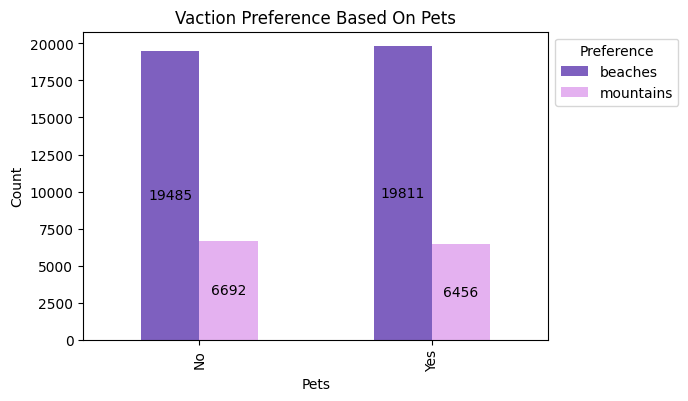

In [3]:
df['Environmental_Concerns'] = pd.Categorical(df['Environmental_Concerns'], categories=['Yes', 'No'], ordered=True)
#above code just to reorder the yes or no columns in graph


Vaction_Preference_BasedOn_Pets = df.groupby(['Pets', 'Preference']).size()
ax = Vaction_Preference_BasedOn_Pets.unstack().plot(kind='bar', figsize=(6, 4), color=['#7E60BF', '#E4B1F0'])

# Move the legend to the right of the plot
plt.legend(title="Preference", loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title("Vaction Preference Based On Pets")
ax.set_ylabel('Count')  # Optional, to remove the y-axis label for a cleaner look

for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [ ]:
#Cross-Analysis of Proximity and Budget:
#Use groupby to analyze the average vacation budget by Proximity_to_Mountains and Proximity_to_Beaches.

In [25]:
AvgVacationBudgetForVactionPreference = df.groupby('Preference')['Vacation_Budget'].mean()
AvgVacationBudgetForVactionPreference

Preference
beaches      2745.365101
mountains    2731.141086
Name: Vacation_Budget, dtype: float64

In [7]:
df.to_csv('D:/Datasets/Vacation_Preference.csv', index=False)